<h1> Salifort Motors Project</h1>
<h3>Richa Patel</h3>
<h4>PRN: 1262240017</h4>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Salifort Motors Data Table</title>
    <style>
        table {
            width: 70%;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 1em;
            text-align: left;
        }
        table, th, td {
            border: 1px solid #dddddd;
        }
        th, td {
            padding: 10px;
        }
        th {
            background-color: #f4f4f4;
        }
    </style>
</head>
<body>
    <h3>Salifort Motors Data Table</h3>
    <table>
        <thead>
            <tr>
                <th>Column Name</th>
                <th>Values</th>
                <th>Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>satisfaction_level</td>
                <td>0 to 1</td>
                <td>Indicates how satisfied the employee is, 0 for not satisfied, 1 for very satisfied.</td>
            </tr>
            <tr>
                <td>last_evaluation</td>
                <td>0 to 1</td>
                <td>Evaluation score given to the employee in the last evaluation.</td>
            </tr>
            <tr>
                <td>number_project</td>
                <td>Positive Integer</td>
                <td>Number of projects completed by the employee.</td>
            </tr>
            <tr>
                <td>average_monthly_hours</td>
                <td>Positive Integer</td>
                <td>Average monthly hours spent by the employee at the company.</td>
            </tr>
            <tr>
                <td>time_spend_company</td>
                <td>Positive Integer</td>
                <td>Number of years spent at the company.</td>
            </tr>
            <tr>
                <td>work_accident</td>
                <td>0 or 1</td>
                <td>Indicates whether the employee had any work-related accidents (0 for no, 1 for yes).</td>
            </tr>
            <tr>
                <td>promotion_last_5years</td>
                <td>0 or 1</td>
                <td>Indicates if the employee was promoted in the last 5 years (0 for no, 1 for yes).</td>
            </tr>
            <tr>
                <td>department</td>
                <td>Class</td>
                <td>Department name the employee belongs to.</td>
            </tr>
            <tr>
                <td>salary</td>
                <td>low, medium, high</td>
                <td>Salary bracket of the employee.</td>
            </tr>
            <tr>
                <td>left ( target )</td>
                <td>0 or 1</td>
                <td>Indicates whether the employee has left the company (0 for no, 1 for yes).</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

### Import packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics

## Step 1. Read Dataset

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)




In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df1 = df0.rename(columns={
    'number_project': 'no_of_projects',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department'
})

df1.head()

,satisfaction_level,last_evaluation,no_of_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
no_of_projects           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
df1.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated()].head()

,satisfaction_level,last_evaluation,no_of_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df2 = df1.drop_duplicates(keep="first")


# Display first few rows of new dataframe as needed
df2.head()

,satisfaction_level,last_evaluation,no_of_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

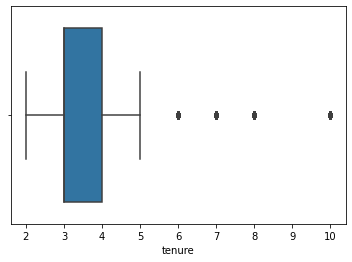

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df2['tenure'])


In [ ]:
# Determine the number of rows containing outliers
df2[df2['tenure'] >= 6]['tenure'].value_counts().sum()


824

In [ ]:
# Get numbers of people who left vs. stayed
left = df2[df2['left'] == 1].value_counts().sum()
stayed = df2[df2['left'] == 0].value_counts().sum()

# Get percentages of people who left vs. stayed
left_percent = ( left/(left+stayed) )*100
stayed_percent = ( stayed/(left+stayed) )*100

print('left percent = ', left_percent)
print('stayed percent = ', stayed_percent)


left percent =  16.604119756484028
stayed percent =  83.39588024351598


### Data visualizations

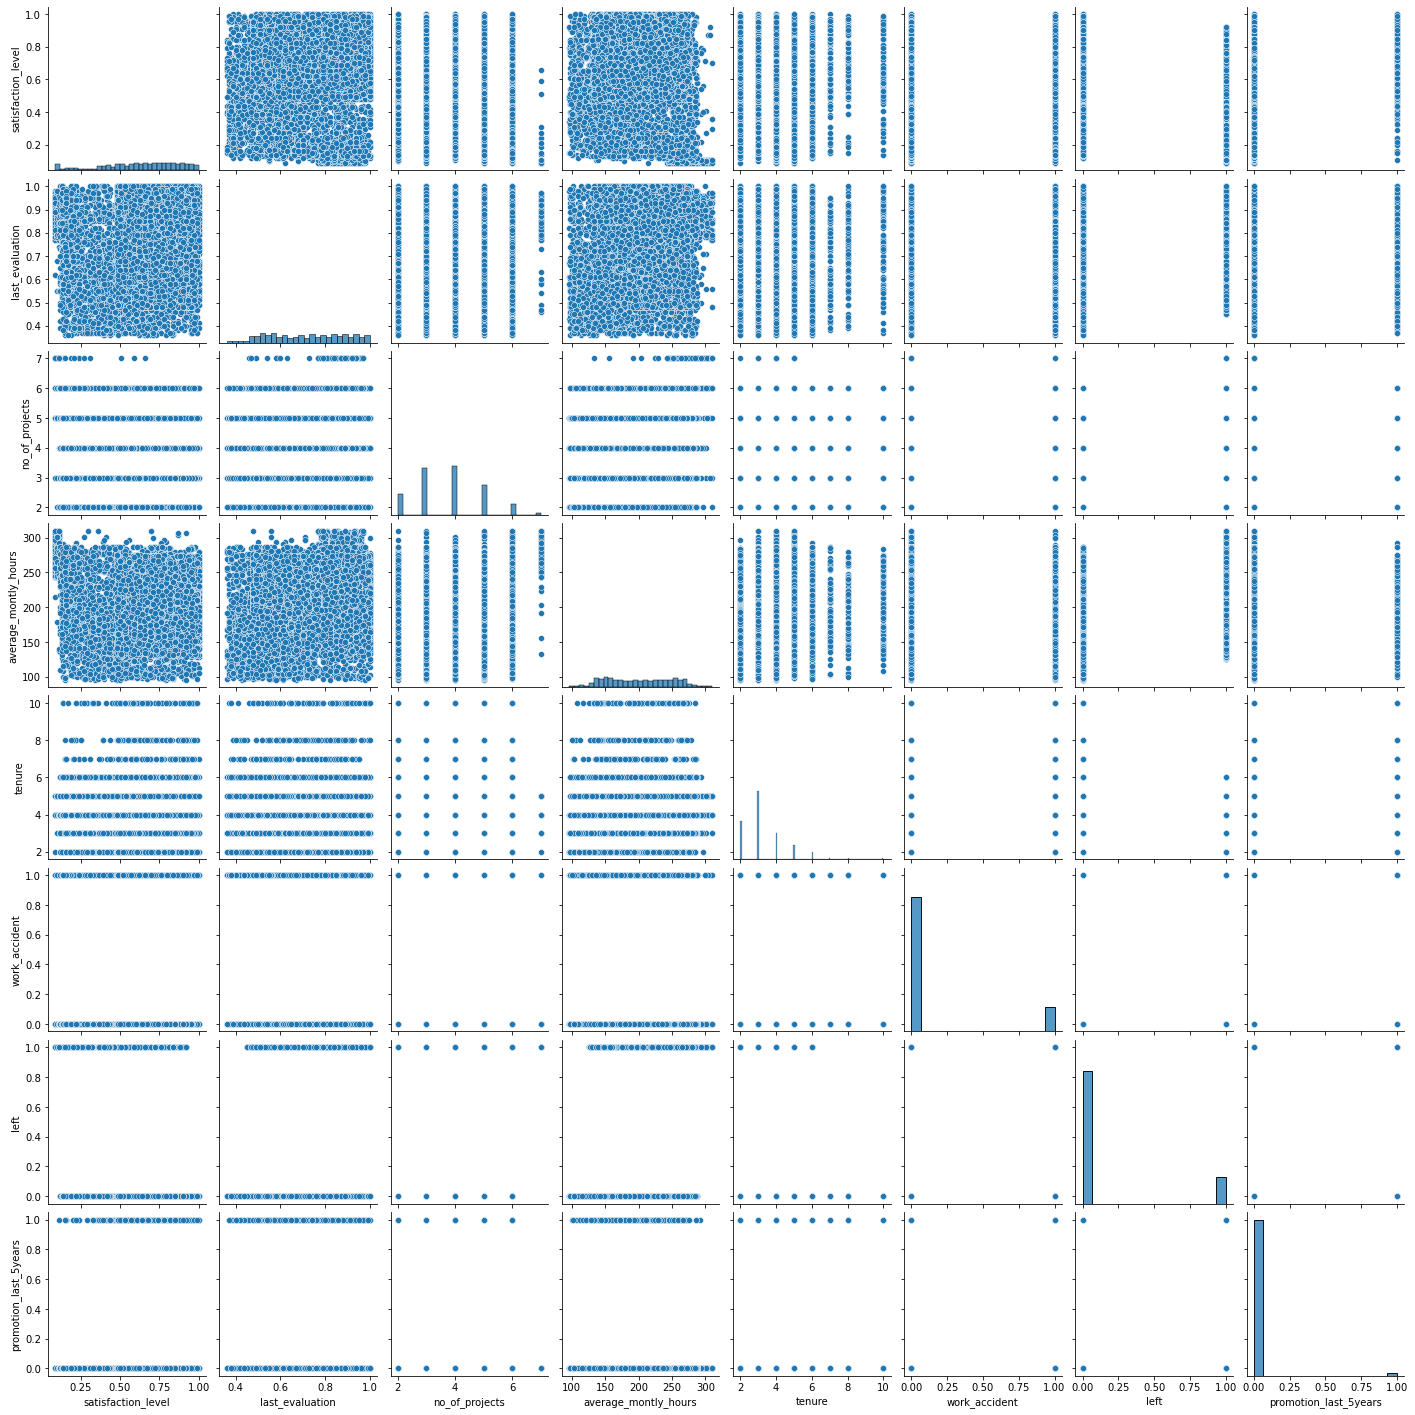

In [ ]:
# Create a plot as needed
sns.pairplot(df2)

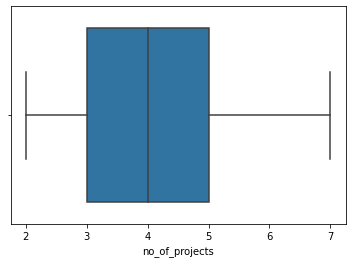

In [ ]:
# Create a plot as needed
sns.boxplot(df2['no_of_projects'])


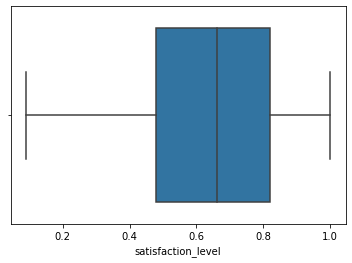

In [ ]:
# Create a plot as needed
sns.boxplot(df2['satisfaction_level'])

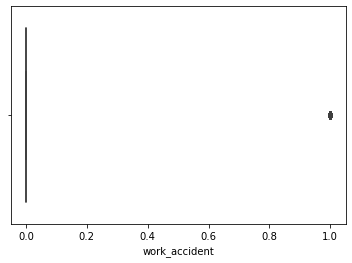

In [ ]:
# Create a plot as needed
sns.boxplot(df2['work_accident'])

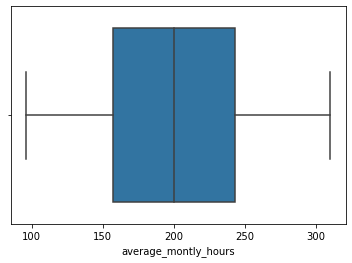

In [ ]:
# Create a plot as needed
sns.boxplot(df2['average_montly_hours'])

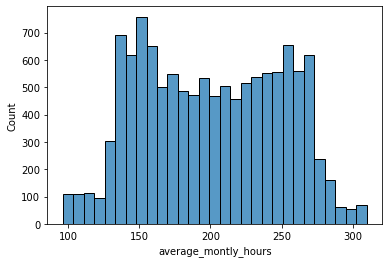

In [ ]:
# Create a plot as needed
sns.histplot(df2['average_montly_hours'])

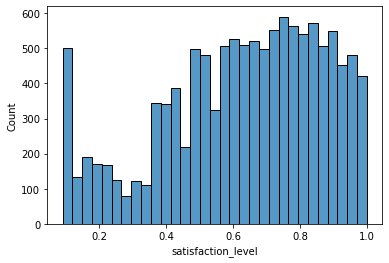

In [ ]:
# Create a plot as needed
sns.histplot(df2['satisfaction_level'])

In [ ]:
# Create a plot as needed
df2['projects_hours_ratio'] = df2['no_of_projects']/df2['average_montly_hours']

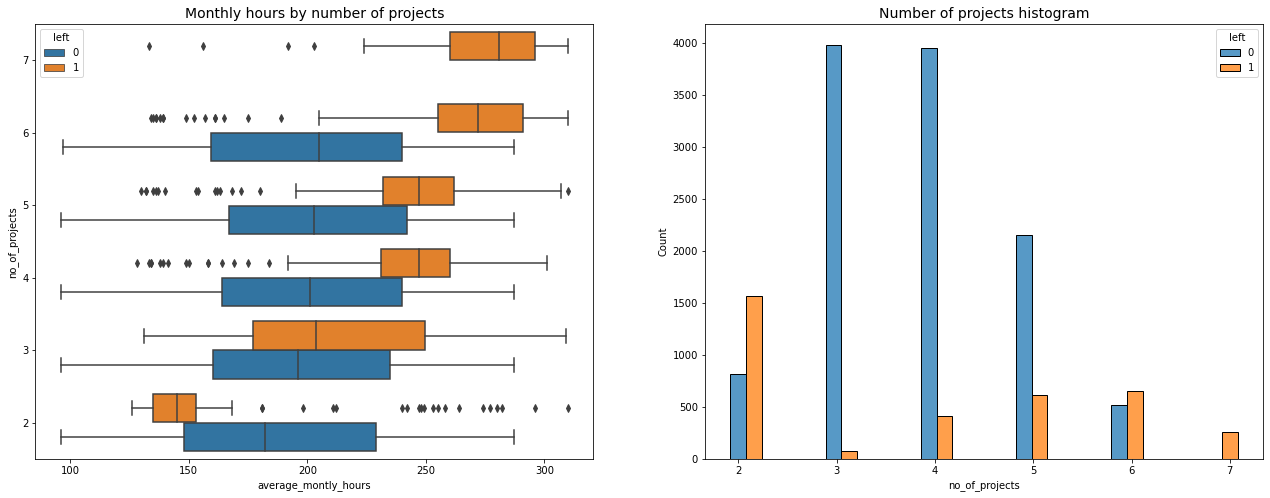

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who
# stayed versus those who left
sns.boxplot(data=df2, x='average_montly_hours', y='no_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df2[df2['left']==0]['no_of_projects']
tenure_left = df2[df2['left']==1]['no_of_projects']
sns.histplot(data=df1, x='no_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

## Step 3. Model Building, Step 4. Results and Evaluation


### Modeling



In [ ]:

y = df2['left']
X = df2.drop('left', axis=1)



In [ ]:
X.drop(columns=['last_evaluation', 'work_accident', 'promotion_last_5years', 'department'], inplace=True)

In [ ]:
X = pd.get_dummies(X, columns=['salary'], drop_first=True)
X.head()

,satisfaction_level,no_of_projects,average_montly_hours,tenure,projects_hours_ratio,salary_low,salary_medium
0,0.38,2,157,3,0.012739,1,0
1,0.80,5,262,6,0.019084,0,1
2,0.11,7,272,4,0.025735,0,1
3,0.72,5,223,5,0.022422,1,0
4,0.37,2,159,3,0.012579,1,0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
ypred = xgb.predict(xtest)

## Step 4. Results and Evaluation

In [ ]:
print("accuracy = ", metrics.accuracy_score(ytest,ypred))
print("precision = ", metrics.precision_score(ytest,ypred))
print("recall = ", metrics.recall_score(ytest,ypred))
print("f1 score = ", metrics.f1_score(ytest,ypred))

accuracy =  0.9787411421425594
precision =  0.9577836411609498
recall =  0.9120603015075377
f1 score =  0.9343629343629343


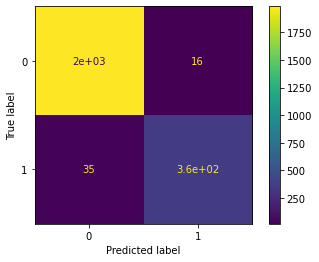

In [ ]:
cm = metrics.confusion_matrix(ytest, ypred)
metrics.ConfusionMatrixDisplay(cm, display_labels=xgb.classes_).plot()
